# 🛒 Online Retail Sales Analysis & RFM Customer Segmentation

This project performs end-to-end analysis on the **Online Retail dataset**, including:

- ✅ Exploratory Data Analysis (EDA)
- ✅ Data cleaning & preprocessing
- ✅ Revenue and sales KPIs
- ✅ Product, country, and customer insights
- ✅ RFM Analysis (Recency, Frequency, Monetary)
- ✅ RFM Scoring & Customer Segmentation
- ✅ K-Means clustering on RFM features
- ✅ Business recommendations

The dataset contains real e-commerce transactions from a UK-based retailer (2010–2011).


## 1️⃣ Import Necessary Libraries


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2️⃣ Load Dataset

We upload the **Online Retail.xlsx** file and load it into a pandas DataFrame.


In [45]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("Online Retail.xlsx", engine="openpyxl")






Saving Online Retail.xlsx to Online Retail (2).xlsx


## 3️⃣ Dataset Overview

A first look at the dataset including:
- Sample rows
- Data types
- Summary statistics


In [46]:

df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(  InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  ,
 None,
             Quantity                    InvoiceDate      UnitPrice  \
 count  541909.000000                         541909  541909.000000   
 mean        9.552250  201

## 4️⃣ Data Cleaning

We clean the dataset using the following steps:

- ❌ Remove cancelled transactions (InvoiceNo starting with "C")
- ❌ Remove negative quantities  
- ❌ Remove missing CustomerID values  
- ✅ Convert InvoiceDate to datetime  
- ✅ Create Revenue = Quantity × UnitPrice  
- ❌ Filter extreme UnitPrice values  
- ✅ Remove duplicates  
- ✅ Reset index  

After cleaning, the dataset is ready for analysis.


In [16]:
# Remove cancelled orders (InvoiceNo starting with "C")
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

df = df[df['Quantity'] > 0]

df = df.dropna(subset=['CustomerID'])

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Revenue'] = df['Quantity'] * df['UnitPrice']

df = df[df['UnitPrice'] <= 5000]

df = df.drop_duplicates()

df = df.reset_index(drop=True)


df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392731 entries, 0 to 392730
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392731 non-null  object        
 1   StockCode    392731 non-null  object        
 2   Description  392731 non-null  object        
 3   Quantity     392731 non-null  int64         
 4   InvoiceDate  392731 non-null  datetime64[ns]
 5   UnitPrice    392731 non-null  float64       
 6   CustomerID   392731 non-null  float64       
 7   Country      392731 non-null  object        
 8   Revenue      392731 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 5️⃣ Key Dataset Metrics

We calculate key business metrics such as:

- Number of unique customers  
- Number of products  
- Number of invoices  
- Number of countries  


In [17]:
print("Unique customers:", df['CustomerID'].nunique())
print("Unique products:", df['StockCode'].nunique())
print("Unique invoices:", df['InvoiceNo'].nunique())
print("Countries:", df['Country'].nunique())


Unique customers: 4339
Unique products: 3665
Unique invoices: 18535
Countries: 37


## 6️⃣ Revenue by Country (excluding UK)

We analyze which countries generate the highest revenue outside the United Kingdom.


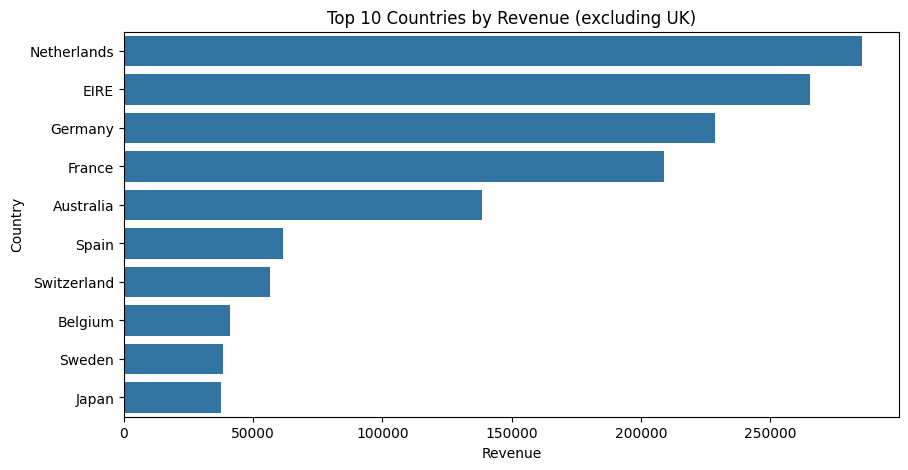

In [18]:
country_sales = (
    df[df['Country'] != "United Kingdom"]
    .groupby("Country")['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Revenue (excluding UK)")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


## 7️⃣ Monthly Revenue Trend

We group transactions by month and plot the monthly revenue time series.


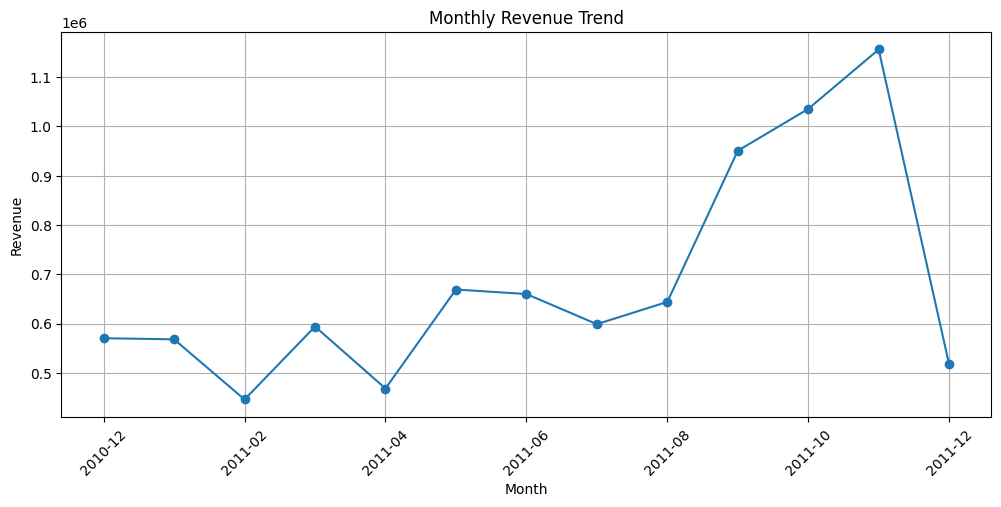

In [19]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum()

plt.figure(figsize=(12,5))
monthly_revenue.plot(marker="o")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 8️⃣ Top 10 Products by Revenue

Identifying the products that contribute the most to total revenue.


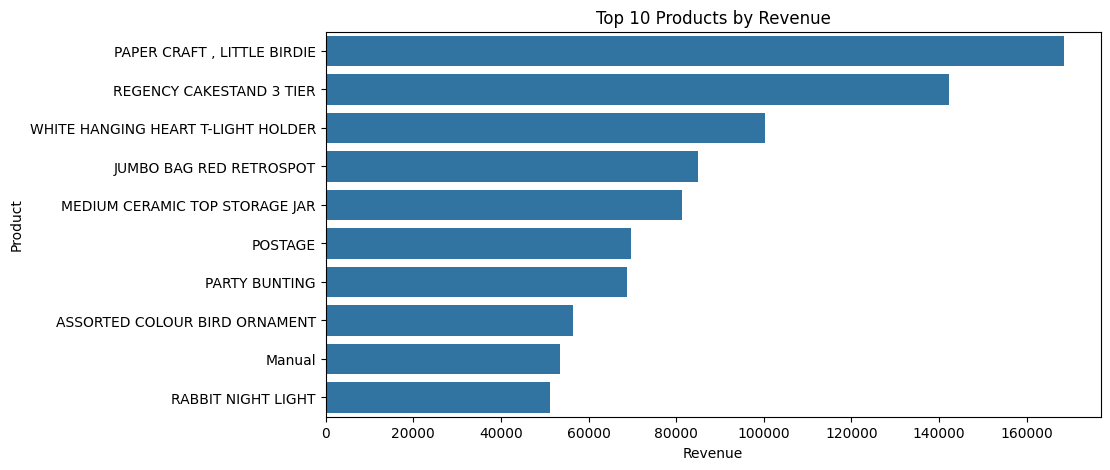

In [20]:
top_products = (
    df.groupby("Description")['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


## 9️⃣ Top Customers by Revenue

We examine the top-spending customers and their contribution to total income.


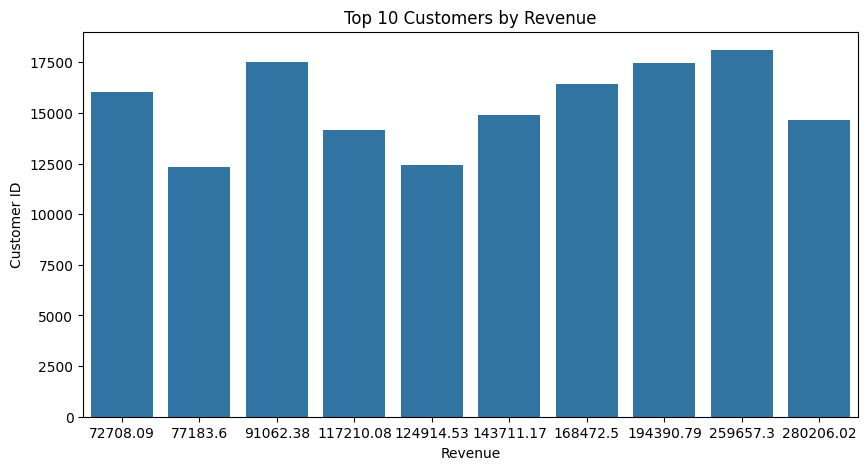

In [21]:
top_customers = (
    df.groupby("CustomerID")['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.show()


## 🔟 Distribution Analysis

We visualize the distribution of:
- Purchased quantities  
- Unit prices  
to detect skewness and unusual patterns.


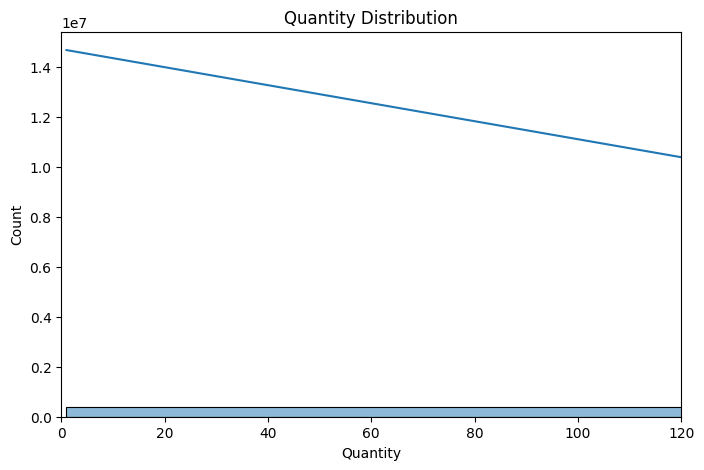

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.xlim(0, df['Quantity'].quantile(0.99))
plt.title("Quantity Distribution")
plt.show()


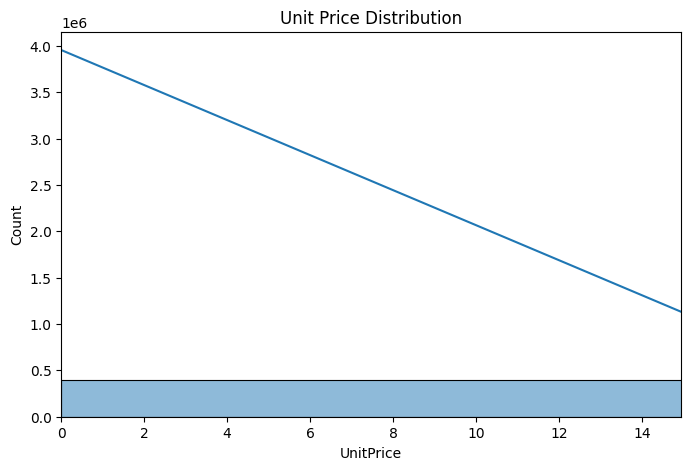

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.xlim(0, df['UnitPrice'].quantile(0.99))
plt.title("Unit Price Distribution")
plt.show()


## 1️⃣1️⃣ RFM Analysis (Recency – Frequency – Monetary)

RFM is a powerful technique used in marketing and CRM.

- **Recency:** Days since the last purchase  
- **Frequency:** Number of unique transactions  
- **Monetary:** Total spending  

We compute RFM metrics for each customer.


In [26]:
# We define a reference date = last date in dataset
reference_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
}).rename(columns={'InvoiceDate': 'Recency'})

frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
rfm['Frequency'] = frequency

monetary = df.groupby('CustomerID')['Revenue'].sum()
rfm['Monetary'] = monetary

rfm.head()
rfm.describe()


,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,4.271722,2046.339282
std,100.009747,7.703751,8968.621000
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,306.455000
50%,50.000000,2.000000,668.560000
75%,141.000000,5.000000,1660.315000
max,373.000000,210.000000,280206.020000


In [32]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

f_bins = pd.qcut(rfm['Frequency'], 4, duplicates='drop')
f_labels = range(1, len(f_bins.cat.categories) + 1)

rfm['F_score'] = pd.qcut(
    rfm['Frequency'],
    q=4,
    labels=f_labels,
    duplicates='drop'
)

m_bins = pd.qcut(rfm['Monetary'], 4, duplicates='drop')
m_labels = range(1, len(m_bins.cat.categories) + 1)

rfm['M_score'] = pd.qcut(
    rfm['Monetary'],
    q=4,
    labels=m_labels,
    duplicates='drop'
)


In [33]:
rfm['RFM_Score'] = (
    rfm['R_score'].astype(str) +
    rfm['F_score'].astype(str) +
    rfm['M_score'].astype(str)
)

rfm['RFM_Sum'] = (
    rfm['R_score'].astype(int) +
    rfm['F_score'].astype(int) +
    rfm['M_score'].astype(int)
)


## 1️⃣2️⃣ RFM Scoring

We transform Recency, Frequency, and Monetary values into 4-level scores using quantiles.

We generate:

- `R_score`
- `F_score`
- `M_score`
- `RFM_Score` (string form, e.g., "432")
- `RFM_Sum` (numeric score used for segmentation)


In [34]:
def rfm_segment(score):
    if score >= 10:
        return 'Champions'
    elif score >= 8:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalists'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Hibernating'

rfm['Segment'] = rfm['RFM_Sum'].apply(rfm_segment)


## 1️⃣3️⃣ RFM Customer Segments

We classify customers into meaningful business groups:

- **Champions**  
- **Loyal Customers**  
- **Potential Loyalists**  
- **At Risk**  
- **Hibernating**

These segments help with targeted marketing strategies.


In [35]:
rfm['Segment'].value_counts()

rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()


,Recency,Frequency,Monetary
Segment,,,
At Risk,139.100782,1.422242,385.258906
Champions,11.868090,12.788945,7218.801357
Hibernating,260.642715,1.121756,169.279541
Loyal Customers,35.034982,4.463209,1917.056696
Potential Loyalists,63.954802,2.312618,956.137676


## 1️⃣4️⃣ RFM Visualizations

We visualize:

- Distribution of customers across segments  
- Average Recency, Frequency, and Monetary scores per segment (heatmap)


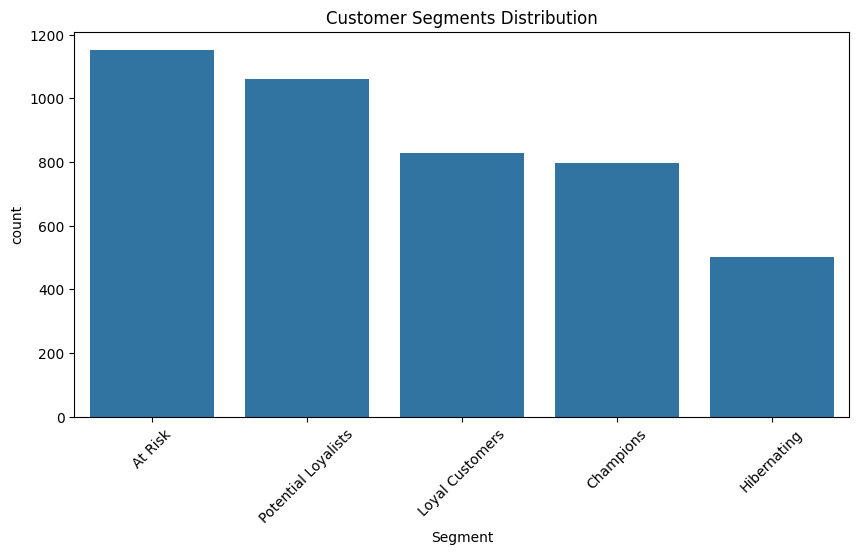

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title("Customer Segments Distribution")
plt.xticks(rotation=45)
plt.show()


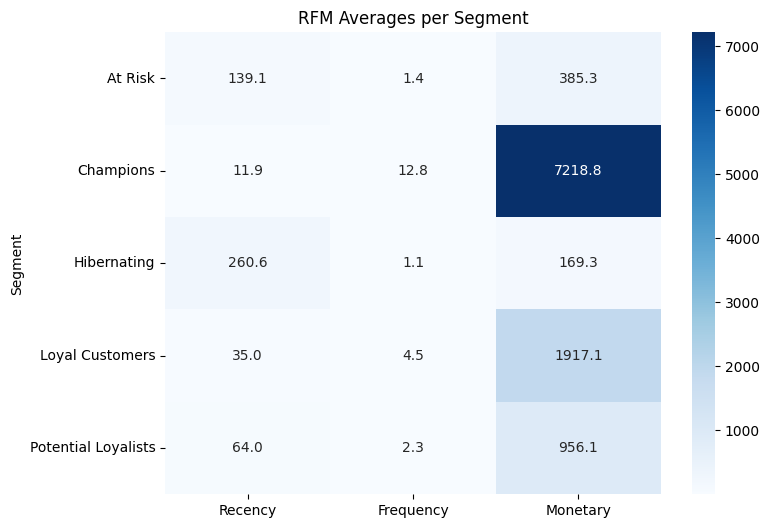

In [37]:
segment_summary = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()

plt.figure(figsize=(8,6))
sns.heatmap(segment_summary, annot=True, fmt=".1f", cmap="Blues")
plt.title("RFM Averages per Segment")
plt.show()


## 📁 Export RFM Results

We export the final RFM table to Excel for further business use.


In [38]:
rfm.to_excel("RFM_results.xlsx", index=True)

files.download("RFM_results.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1️⃣5️⃣ K-Means Clustering on RFM Metrics

We apply K-Means to the scaled RFM variables:

- Standard scaling  
- Elbow method to determine best K  
- Fitting the K-Means model  
- 3D scatter plot of RFM clusters  

This adds a machine learning component to the analysis.


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])


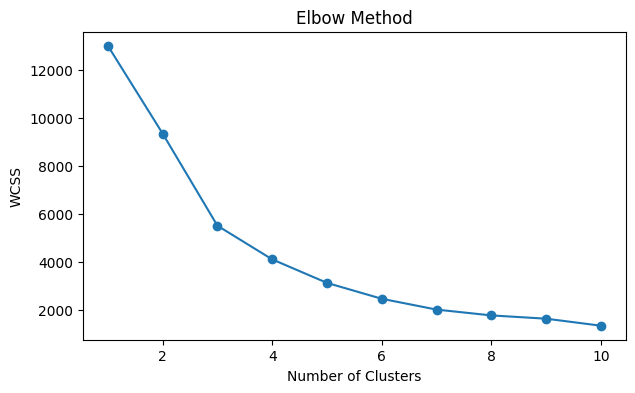

In [40]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [41]:
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = rfm['Cluster'].astype(str)


### 3D Visualization of K-Means Clusters

A 3D view of customer groups based on Recency, Frequency, and Monetary values.


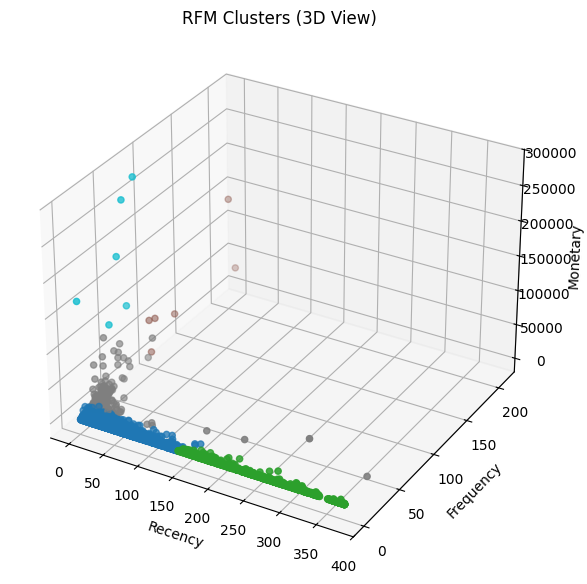

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
    c=rfm['Cluster'].astype(int), cmap='tab10'
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clusters (3D View)')
plt.show()


## ✅ Final Conclusions & Business Recommendations

### 🏆 Champions
- Highly active and high-value customers  
✅ Provide exclusive rewards and early access to new products

### ❤️ Loyal Customers
- Stable purchasing behavior  
✅ Promote loyalty program upgrades and personalized offers

### 🌱 Potential Loyalists
- Promising customers with recent activity  
✅ Use personalized recommendations and targeted campaigns

### ⚠️ At Risk
- Previously active but declining  
✅ Send win-back emails and limited-time discounts

### 💤 Hibernating
- No recent activity  
✅ Reactivation campaigns and reminders

---

This analysis provides actionable insights for customer relationship management, revenue growth, and data-driven marketing strategies.
